Image(s) loaded successfully


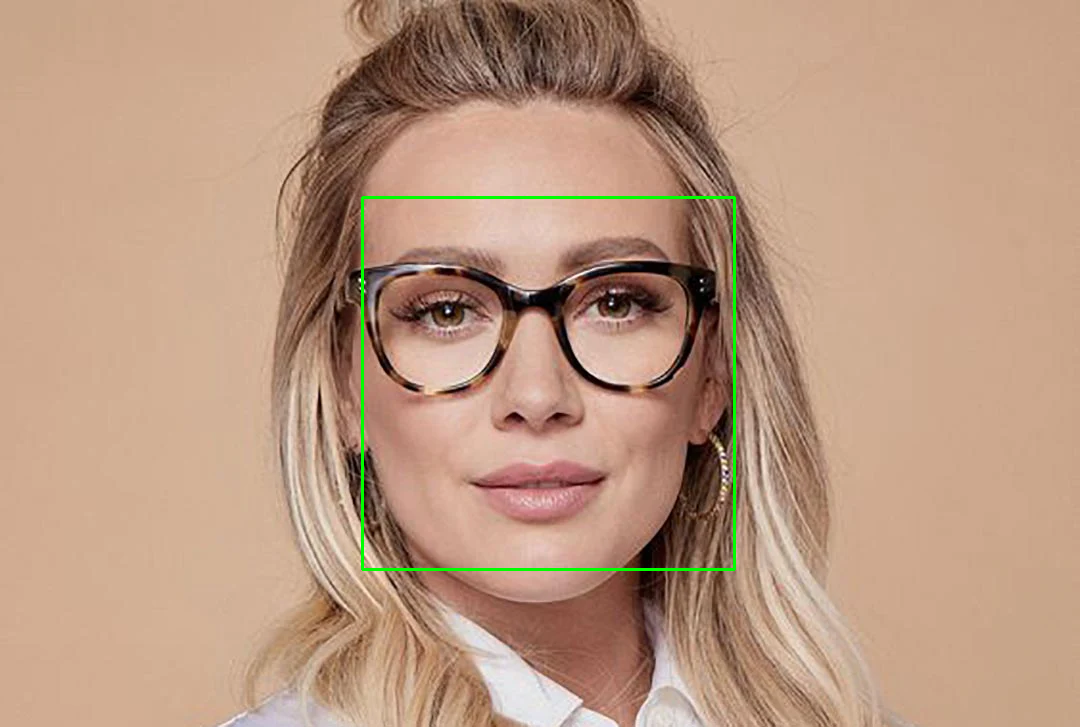

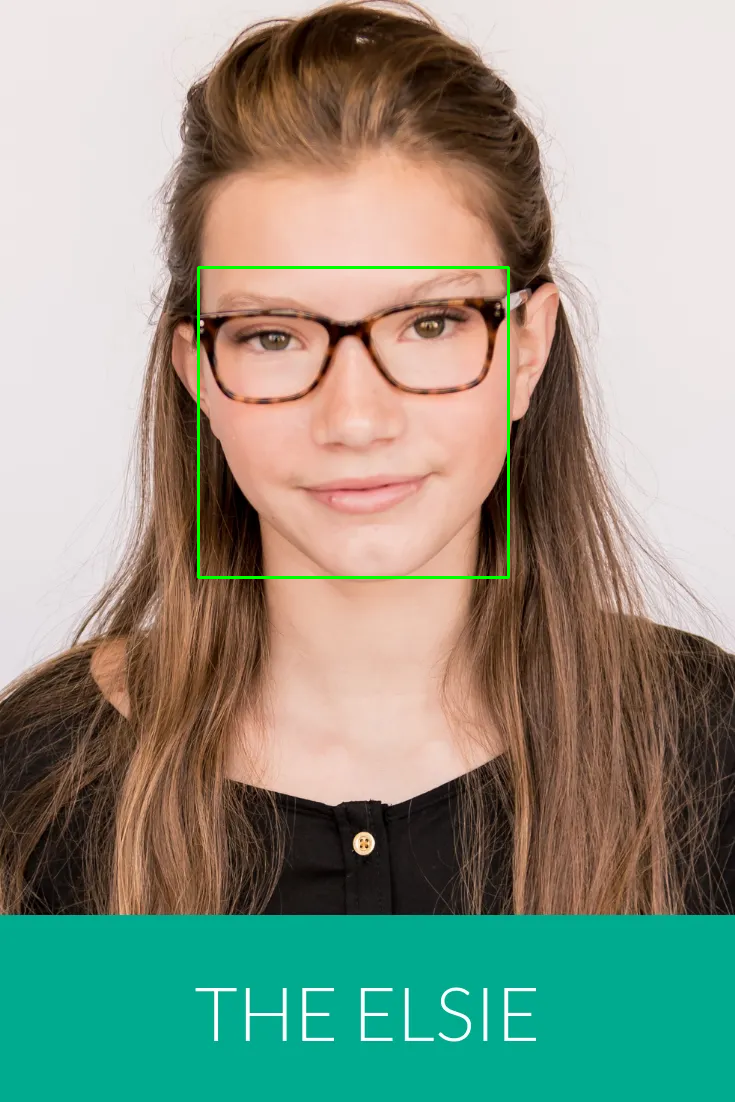

In [8]:
import numpy as np
import cv2
import dlib
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# define the input shape
input_shape = (128, 128, 3)

# create the input layer
input_layer = Input(shape=input_shape)

# create the convolutional layers
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu')(pool2)
pool3 = MaxPooling2D((2, 2))(conv3)
conv4 = Conv2D(256, (3, 3), activation='relu')(pool3)
pool4 = MaxPooling2D((2, 2))(conv4)

# flatten the output from the convolutional layers
flatten = Flatten()(pool4)

# create the fully connected layers
fc1 = Dense(128, activation='relu')(flatten)
fc2 = Dense(64, activation='relu')(fc1)
output_layer = Dense(1, activation='sigmoid')(fc2)

# create the model
model = Model(inputs=input_layer, outputs=output_layer)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# load the image data
img_glasses = cv2.imread('/content/face3.jpg')
img_no_glasses = cv2.imread('/content/face4.jpg')

# check image sizes
if img_glasses.size == 0 or img_no_glasses.size == 0:
    print("Error: Empty image(s) detected")
else:
    print("Image(s) loaded successfully")

# create the dlib face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/shape_predictor_68_face_landmarks.dat')

# detect faces and landmarks in the images
glasses_faces = detector(img_glasses)
no_glasses_faces = detector(img_no_glasses)

# iterate over the detected faces and draw bounding boxes around them
for face in glasses_faces:
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(img_glasses, (x1, y1), (x2, y2), (0, 255, 0), 2)

for face in no_glasses_faces:
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(img_no_glasses, (x1, y1), (x2, y2), (0, 255, 0), 2)

# show the images with bounding boxes
cv2_imshow(img_glasses)
cv2_imshow(img_no_glasses)
cv2.waitKey(0)
cv2.destroyAllWindows()

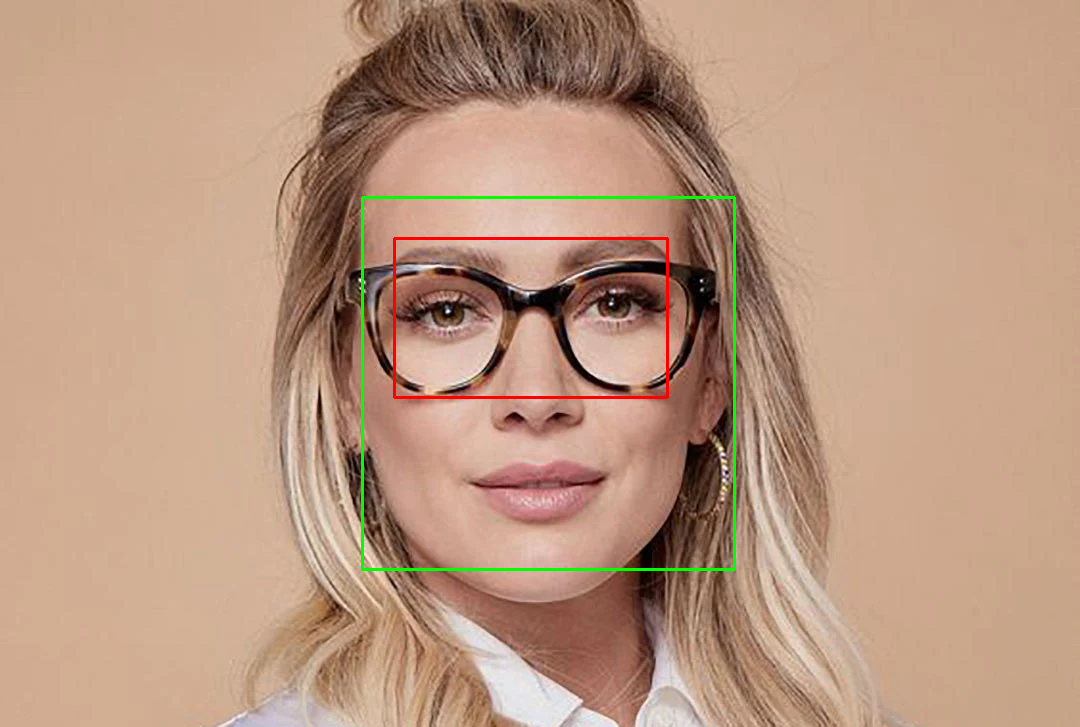

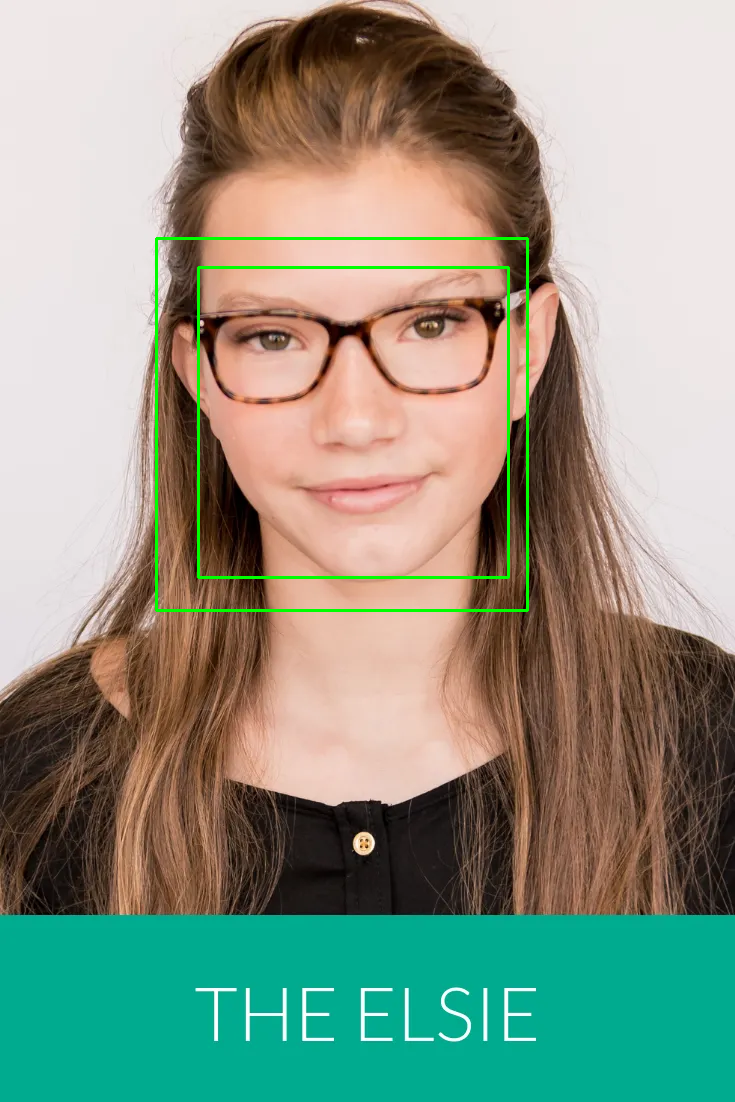

In [9]:
# detect faces and landmarks in the images
glasses_faces = detector(img_glasses)
no_glasses_faces = detector(img_no_glasses)

# iterate over the detected faces and draw bounding boxes around them
for face in glasses_faces:
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(img_glasses, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # detect landmarks in the face
    landmarks = predictor(img_glasses, face)

    # get the coordinates of the left and right eye
    left_eye_x = landmarks.part(36).x
    left_eye_y = landmarks.part(36).y
    right_eye_x = landmarks.part(45).x
    right_eye_y = landmarks.part(45).y

    # calculate the width and height of the glasses region
    glasses_width = right_eye_x - left_eye_x
    glasses_height = int(glasses_width * 0.7)

    # calculate the coordinates of the glasses region
    glasses_x1 = int(left_eye_x - 0.1 * glasses_width)
    glasses_x2 = int(right_eye_x + 0.1 * glasses_width)
    glasses_y1 = int(left_eye_y - 0.5 * glasses_height)
    glasses_y2 = int(left_eye_y + 0.5 * glasses_height)

    # draw the bounding box around the glasses
    cv2.rectangle(img_glasses, (glasses_x1, glasses_y1), (glasses_x2, glasses_y2), (0, 0, 255), 2)

for face in no_glasses_faces:
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(img_no_glasses, (x1, y1), (x2, y2), (0, 255, 0), 2)

# show the images with bounding boxes
cv2_imshow(img_glasses)
cv2_imshow(img_no_glasses)
cv2.waitKey(0)
cv2.destroyAllWindows()

# New Section